Original Dataset:
[[2.5 2.4 1. ]
 [0.5 0.7 0.8]
 [2.2 2.9 0.7]
 [1.9 2.2 1.6]
 [3.1 3.  1.1]]

Standardized Dataset:
[[ 0.46  0.16 -0.04]
 [-1.54 -1.54 -0.24]
 [ 0.16  0.66 -0.34]
 [-0.14 -0.04  0.56]
 [ 1.06  0.76  0.06]]

Covariance Matrix:
[[0.938  0.8405 0.0705]
 [0.8405 0.853  0.0405]
 [0.0705 0.0405 0.123 ]]

Eigenvalues:
[1.7409317  0.04869245 0.12437585]

Eigenvectors:
[[ 0.72426178  0.67367983  0.14697062]
 [ 0.68779778 -0.69076783 -0.22310093]
 [ 0.04877602 -0.26266954  0.96365223]]

PCA Reduced Data:
[[ 0.44125702 -0.00663575]
 [-2.18627795 -0.11403586]
 [ 0.55324457 -0.45137307]
 [-0.10159399  0.5279934 ]
 [ 1.29337035  0.04405129]]

Explained Variance Ratio for top 2 components:
[0.90957769 0.06498216]


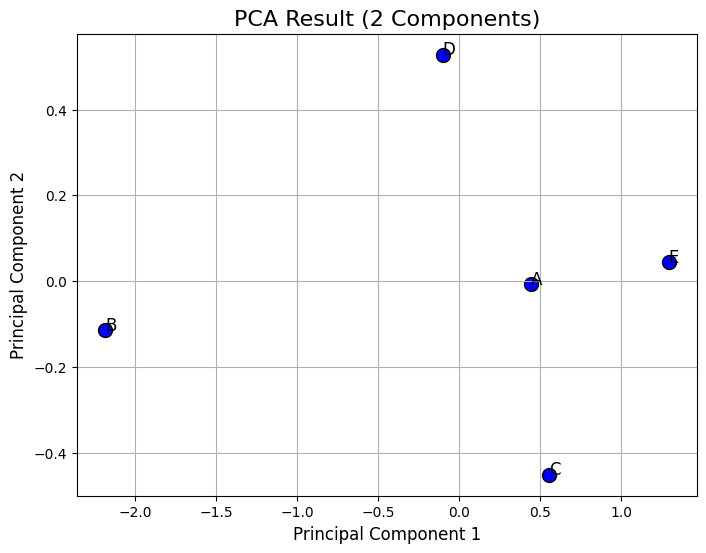

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create the dataset
data = np.array([
    [2.5, 2.4, 1.0],
    [0.5, 0.7, 0.8],
    [2.2, 2.9, 0.7],
    [1.9, 2.2, 1.6],
    [3.1, 3.0, 1.1]
])
print("Original Dataset:")
print(data)

# Step 2: Standardize the dataset
data_mean = np.mean(data, axis=0)
standardized_data = data - data_mean
print("\nStandardized Dataset:")
print(standardized_data)

# Step 3: Compute the covariance matrix
cov_matrix = np.cov(standardized_data, rowvar=False)
#setting rowvar=False tells numpy that the variables are in the columns
#and it will compute the covariance matrix correctly by treating each column as a feature.
print("\nCovariance Matrix:")
print(cov_matrix)

# Step 4: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

# Step 5: Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
#This function returns the indices that would sort the array eigenvalues in ascending order.
#[::-1]: This reverses the indices to get a descending order.
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Step 6: Choose top 2 eigenvectors
top_eigenvectors = eigenvectors[:, :2]

# Step 7: Project data onto the new feature space
pca_data = np.dot(standardized_data, top_eigenvectors)
print("\nPCA Reduced Data:")
print(pca_data)

# Step 8: Explained Variance Ratio
explained_variance_ratio = eigenvalues[:2] / sum(eigenvalues)
print("\nExplained Variance Ratio for top 2 components:")
print(explained_variance_ratio)

# Step 9: Visualize the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], color='blue', edgecolor='k', s=100)
for i, txt in enumerate(['A', 'B', 'C', 'D', 'E']):
    plt.annotate(txt, (pca_data[i, 0], pca_data[i, 1]), fontsize=12)
plt.title("PCA Result (2 Components)", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.grid(True)
plt.show()
